In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns

In [2]:
ada = pd.read_csv("ADA-USD.csv", parse_dates = ["Date"], index_col = "Date")

In [3]:
ada

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,5.006870e+07
2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,5.764130e+07
2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,1.699780e+07
2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9.000050e+06
2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5.562510e+06
...,...,...,...,...,...,...
2021-08-31,2.737641,2.877878,2.706473,2.772475,2.772475,5.085984e+09
2021-09-01,2.769947,2.902614,2.726327,2.870767,2.870767,4.652639e+09
2021-09-02,2.869750,3.099186,2.839781,2.963438,2.963438,7.376032e+09


In [4]:
ada.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1.431000e+03
mean,0.319708,0.337130,0.302364,0.321734,0.321734,1.005328e+09
std,0.520927,0.549858,0.494055,0.525482,0.525482,2.199785e+09
min,0.018414,0.021050,0.017354,0.018539,0.018539,1.739460e+06
25%,0.046842,0.048389,0.045401,0.046886,0.046886,5.169782e+07
50%,0.090832,0.094088,0.087401,0.090867,0.090867,1.276780e+08
75%,0.242979,0.258416,0.229075,0.244634,0.244634,6.083750e+08
max,2.960665,3.099186,2.921135,2.968239,2.968239,1.914198e+10


## Simple LR with 1-Dimension (Open to Close)

In [5]:
Open = ada["Open"]
Open

Date
2017-10-01    0.021678
2017-10-02    0.024607
2017-10-03    0.025757
2017-10-04    0.020864
2017-10-05    0.021951
                ...   
2021-08-31    2.737641
2021-09-01    2.769947
2021-09-02    2.869750
2021-09-03    2.959315
2021-09-04    2.960665
Name: Open, Length: 1435, dtype: float64

In [6]:
Close = ada["Close"]
Close

Date
2017-10-01    0.024969
2017-10-02    0.025932
2017-10-03    0.020816
2017-10-04    0.021931
2017-10-05    0.021489
                ...   
2021-08-31    2.772475
2021-09-01    2.870767
2021-09-02    2.963438
2021-09-03    2.968239
2021-09-04    2.930362
Name: Close, Length: 1435, dtype: float64

In [7]:
X = Open.to_numpy()
X = X.astype(float)
#remove nan values
X = X[np.logical_not(np.isnan(X))]

In [8]:
Y = Close.to_numpy()
Y = Y.astype(float)
#remove nan values
Y = Y[np.logical_not(np.isnan(Y))]

In [9]:
print(X, Y)

[0.021678 0.024607 0.025757 ... 2.86975  2.959315 2.960665] [0.024969 0.025932 0.020816 ... 2.963438 2.968239 2.930362]


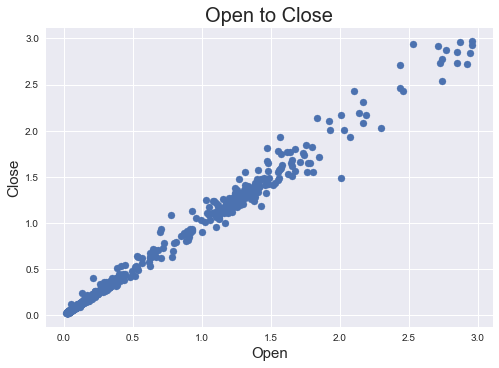

In [10]:
#basic scatterplot
plt.scatter(X,Y)
plt.xlabel("Open", fontsize = 15)
plt.ylabel("Close", fontsize = 15)
plt.title("Open to Close", fontsize = 20)
plt.show();

In [11]:
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

In [12]:
# calculate predicted Y
Yhat = a * X + b
print(Yhat)

[0.0222476  0.02519091 0.02634653 ... 2.88423774 2.97424044 2.97559703]


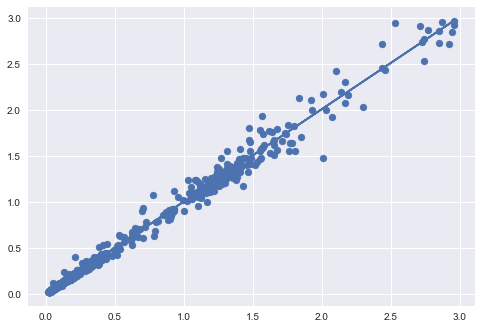

In [13]:
#plot it all
plt.scatter(X, Y)
plt.plot(X, Yhat) # line of best fit
plt.show();

In [14]:
#calculate r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("R-Squared is", r2)

R-Squared is 0.9923669516383147


## Charts from 1-D LR

In [15]:
adaDate = ada.index
adaDate

DatetimeIndex(['2017-10-01', '2017-10-02', '2017-10-03', '2017-10-04',
               '2017-10-05', '2017-10-06', '2017-10-07', '2017-10-08',
               '2017-10-09', '2017-10-10',
               ...
               '2021-08-26', '2021-08-27', '2021-08-28', '2021-08-29',
               '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02',
               '2021-09-03', '2021-09-04'],
              dtype='datetime64[ns]', name='Date', length=1435, freq=None)

In [16]:
#Take X, Y, and Yhat and store them in a dataframe
df = pd.DataFrame({'Open':X, 'Close':Y, 'Predicted Close':Yhat })

In [17]:
ada.reset_index(inplace = True)
ada.head()
adaDate = ada.Date

df['Date'] = ada.Date

In [18]:
df

,Open,Close,Predicted Close,Date
0,0.021678,0.024969,0.022248,2017-10-01
1,0.024607,0.025932,0.025191,2017-10-02
2,0.025757,0.020816,0.026347,2017-10-03
3,0.020864,0.021931,0.021430,2017-10-04
4,0.021951,0.021489,0.022522,2017-10-05
...,...,...,...,...
1426,2.737641,2.772475,2.751483,2021-08-27
1427,2.769947,2.870767,2.783947,2021-08-28
1428,2.869750,2.963438,2.884238,2021-08-29
1429,2.959315,2.968239,2.974240,2021-08-30


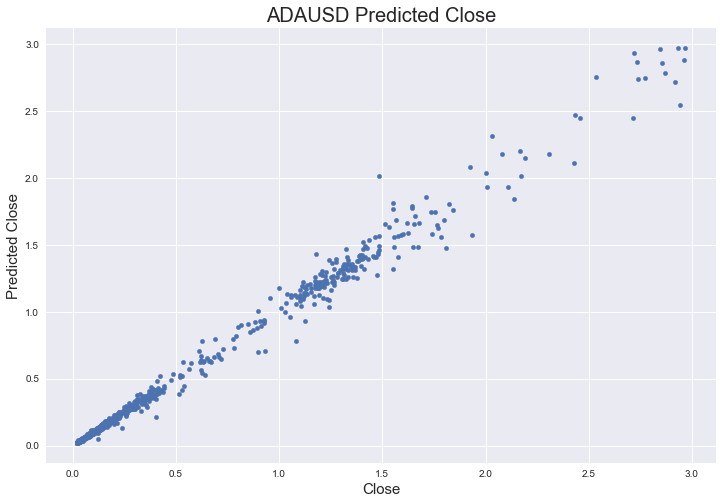

In [19]:
df.plot(kind = "scatter",x = "Close", y = "Predicted Close", figsize = (12,8))
plt.xlabel("Close", fontsize = 15)
plt.ylabel("Predicted Close", fontsize = 15)
plt.title("ADAUSD Predicted Close", fontsize = 20)
plt.show()

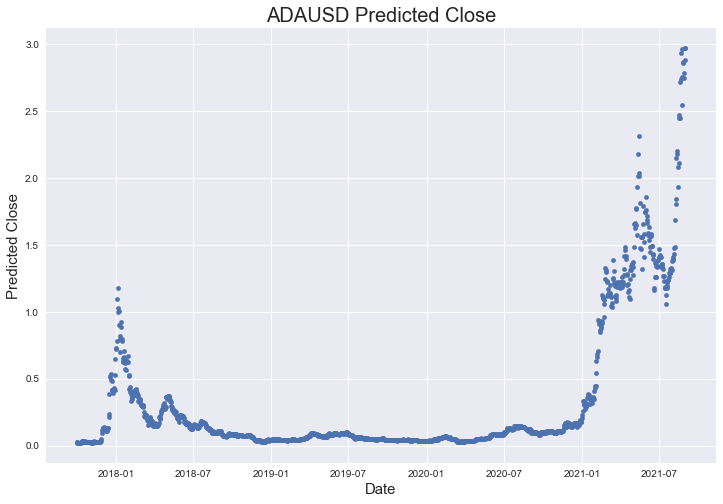

In [20]:
df.plot(kind = "scatter",x = "Date", y = "Predicted Close", figsize = (12,8))
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Predicted Close", fontsize = 15)
plt.title("ADAUSD Predicted Close by Date", fontsize = 20)
plt.show()

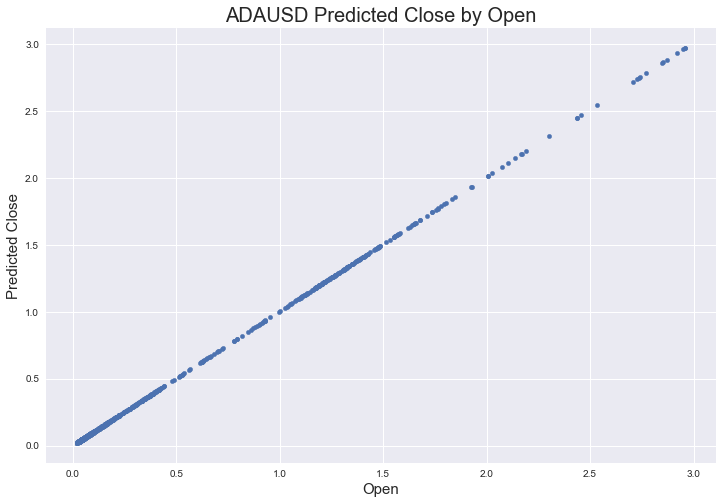

In [21]:
df.plot(kind = "scatter",x = "Open", y = "Predicted Close", figsize = (12,8))
plt.xlabel("Open", fontsize = 15)
plt.ylabel("Predicted Close", fontsize = 15)
plt.title("ADAUSD Predicted Close by Open", fontsize = 20)
plt.show()

## End